<a href="https://colab.research.google.com/github/Jng-su/deeplearning-deepface/blob/main/deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deepface

In [ ]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=ba61c0b290cd3ba1f55c5d57921eb91b1b42bf42c257c788fe6767ebc7b37c40
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


# Deepface 모델 선정 테스트

### 동일 인물 테스트 (모델별)

In [112]:
from deepface import DeepFace
import numpy as np

# 이미지 경로 설정
image_path1 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (1).png"
image_path2 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (2).png"

# 사용하고자 하는 모델 리스트
models = [ "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID",  "ArcFace", "Dlib", "SFace", "GhostFaceNet" ]


for model_name in models:
    print(f'\n{"="*60}\n\nTesting model: {model_name}')

    try:
        # 두 이미지의 얼굴 임베딩을 계산
        embedding1 = DeepFace.represent(img_path=image_path1, model_name=model_name)[0]["embedding"]
        embedding2 = DeepFace.represent(img_path=image_path2, model_name=model_name)[0]["embedding"]

        # 임베딩 벡터의 코사인 유사도 계산
        cosine_similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

        # 유사도 출력
        print(f"Accuracy with {model_name}: {cosine_similarity}")

    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")

print (f'\n{"="*60}')



Testing model: VGG-Face
Accuracy with VGG-Face: 0.732075657099241


Testing model: Facenet
Accuracy with Facenet: 0.8974553243869735


Testing model: Facenet512
Accuracy with Facenet512: 0.8945186010611428


Testing model: OpenFace
Accuracy with OpenFace: 0.6660119273429991


Testing model: DeepFace
Error with DeepFace: DeepFace model requires LocallyConnected2D but it is no longer supported after tf 2.12 but you have 2.17. You need to downgrade your tf.


Testing model: DeepID
Accuracy with DeepID: 0.9556561616083468


Testing model: ArcFace
Accuracy with ArcFace: 0.6673980142287589


Testing model: Dlib
Error with Dlib: Error while calling cudaGetDevice(&the_device_id) in file /tmp/pip-install-__q6gnzd/dlib_8e35246b18d44028abb0e646a3c92032/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version


Testing model: SFace
Accuracy with SFace: 0.710532465310893


Testing model: GhostFaceNet
Accuracy with GhostFaceNet: 0.6025145324390128


결과 : DeepID가 성능이 좋아보임 또는 facenet, facenet512

### 다른 인물 테스트 (모델별)

In [113]:
from deepface import DeepFace
import numpy as np

# 이미지 경로 설정
image_path1 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (1).png"
image_path2 = "/content/drive/MyDrive/deepface/data/Benedict Cumberbatch (2).png"

# 사용하고자 하는 모델 리스트
models = [ "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID",  "ArcFace", "Dlib", "SFace", "GhostFaceNet" ]


for model_name in models:
    print(f'\n{"="*60}\n\nTesting model: {model_name}')

    try:
        # 두 이미지의 얼굴 임베딩을 계산
        embedding1 = DeepFace.represent(img_path=image_path1, model_name=model_name)[0]["embedding"]
        embedding2 = DeepFace.represent(img_path=image_path2, model_name=model_name)[0]["embedding"]

        # 임베딩 벡터의 코사인 유사도 계산
        cosine_similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

        # 유사도 출력
        print(f"Accuracy with {model_name}: {cosine_similarity}")

    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")

print (f'\n{"="*60}')



Testing model: VGG-Face
Accuracy with VGG-Face: 0.042227660308056685


Testing model: Facenet
Accuracy with Facenet: -0.14278798182229493


Testing model: Facenet512
Accuracy with Facenet512: -0.20904862138952346


Testing model: OpenFace
Accuracy with OpenFace: 0.5802419424698372


Testing model: DeepFace
Error with DeepFace: DeepFace model requires LocallyConnected2D but it is no longer supported after tf 2.12 but you have 2.17. You need to downgrade your tf.


Testing model: DeepID
Accuracy with DeepID: 0.878178392076476


Testing model: ArcFace
Accuracy with ArcFace: -0.005570723053015217


Testing model: Dlib
Error with Dlib: Error while calling cudaGetDevice(&the_device_id) in file /tmp/pip-install-__q6gnzd/dlib_8e35246b18d44028abb0e646a3c92032/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version


Testing model: SFace
Accuracy with SFace: 0.13198735337083142


Testing model: GhostFaceNet
Accuracy with GhostFaceNet: 0.061629

결과 : 예상과달리 DeepID의 성능이 이상함, facenet 혹은 facenet512 선택

# Deepface 라이브러리의 Facenet 사용

### 기준 이미지와 서로 다른 이미지들 비교 (임계값 0.80)

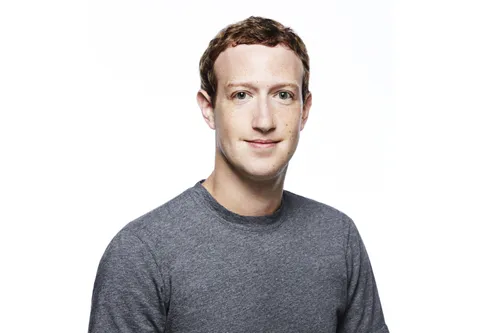


Comparing_image = Mark Zuckerberg (1).png


>>>>> Elon Musk (1).png <<<<<
Cosine Similarity: -0.076094
Match: False


>>>>> Mark Zuckerberg (2).png <<<<<
Cosine Similarity: 0.897455
Match: True


>>>>> Mark Zuckerberg (3).png <<<<<
Cosine Similarity: 0.827500
Match: True


>>>>> Benedict Cumberbatch (1).png <<<<<
Cosine Similarity: -0.045518
Match: False


>>>>> Benedict Cumberbatch (2).png <<<<<
Cosine Similarity: -0.142788
Match: False



In [118]:
from deepface import DeepFace
import numpy as np
import os
from IPython.display import Image, display

compare_img = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (1).png"

display(Image(filename=compare_img))

compare_img_name = os.path.basename(compare_img)

print(f'{"=" * 60}\n\nComparing_image = {compare_img_name}\n\n{"=" * 60}')

temp_imgs = [
    "/content/drive/MyDrive/deepface/data/Elon Musk (1).png",
    "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (2).png",
    "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (3).png",
    "/content/drive/MyDrive/deepface/data/Benedict Cumberbatch (1).png",
    "/content/drive/MyDrive/deepface/data/Benedict Cumberbatch (2).png"
]

embedding_1 = DeepFace.represent(img_path=compare_img, model_name="Facenet")[0]["embedding"]

for img in temp_imgs:
    embedding_2 = DeepFace.represent(img_path=img, model_name="Facenet")[0]["embedding"]
    cosine_similarity = np.dot(embedding_1, embedding_2) / (np.linalg.norm(embedding_1) * np.linalg.norm(embedding_2))

    # 파일명 추출
    img_name = os.path.basename(img)

    print(f"\n>>>>> {img_name} <<<<<")
    print(f"Cosine Similarity: {cosine_similarity:.6f}")
    print(f"Match: {cosine_similarity > 0.80}")
    print(f'\n{"=" * 60}')

결과 : Accuracy 임계값을 0.95 이상으로 하고 싶지만 오차 범위가 생각보다 큼 -> 0.80로 줄임

추후 : 해상도를 낮추고 테스트 실행 (해상도 관련 라이브러리)